In [1]:
import os
os.environ["DISABLE_MPI"]="1"

In [2]:
import numpy as np
from pixell import enmap, utils, enplot, colorize

In [3]:
def nonan(a):
        res = a.copy()
        res[~np.isfinite(res)]=0
        return res

In [4]:
cmap       = colorize.schemes["planck"].reverse()
dust       = enmap.read_map("data/planck_353_small.fits")
ivar_f150  = enmap.read_map("data/ivar_tot_f150_small.fits")
ivar_f090  = enmap.read_map("data/ivar_tot_f090_small.fits")

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


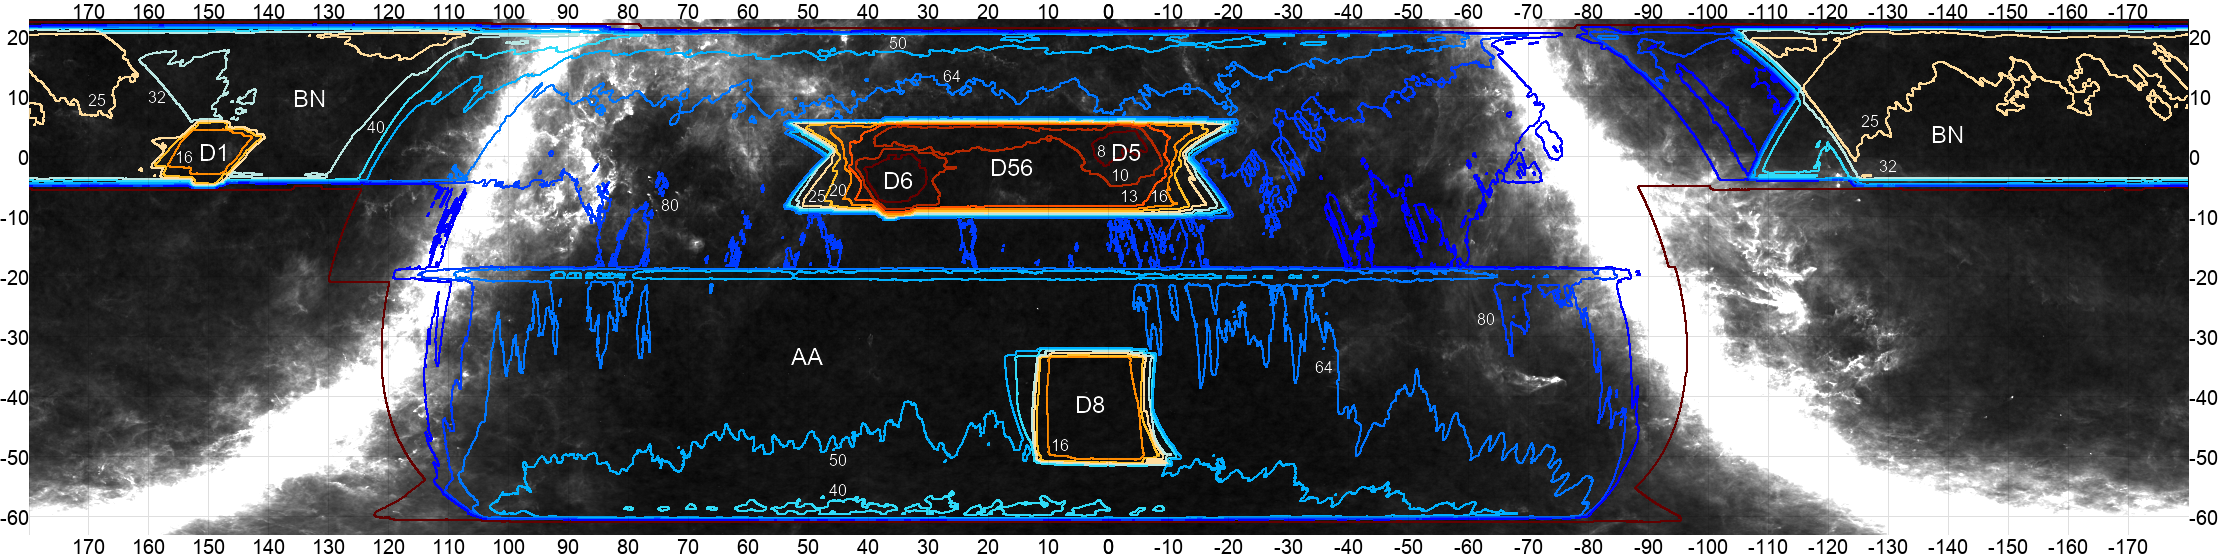

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.


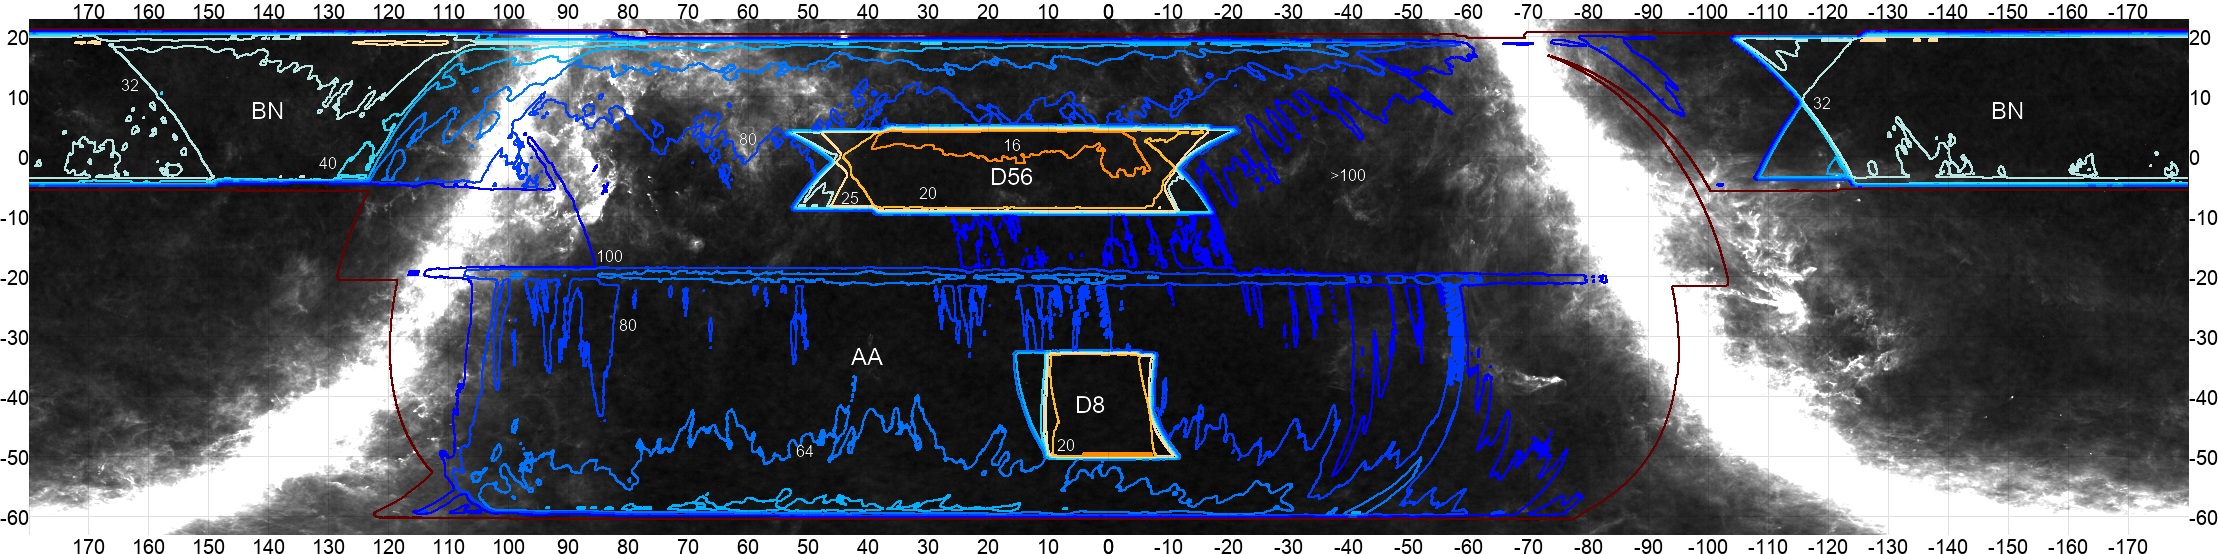

In [5]:
dust_layers = enplot.plot(dust, ticks=10, layers=True, color="gray", reverse_color=False, min=0, max=1e4, slice="[0]")

f150_layers = enplot.plot(nonan(np.log10(ivar_f150**-0.5)), ticks=10, min=np.log10(7.5), max=np.log10(101),\
                          layers=True, contours="0.903:0.1", contour_color=cmap, contour_width=2, no_image=True,\
                          annotate="data/annot_f150.txt")
plot_f150   = enplot.merge_plots(dust_layers[:1]+f150_layers)
enplot.show(plot_f150)
enplot.write("plots/depth_map_f150.png", plot_f150)
        
f090_layers = enplot.plot(nonan(np.log10(ivar_f090**-0.5)), ticks=10, min=np.log10(7.5), max=np.log10(101),\
                          layers=True, contours="0.903:0.1", contour_color=cmap, contour_width=2, no_image=True,\
                          annotate="data/annot_f090.txt")  
plot_f090   = enplot.merge_plots(dust_layers[:1]+f090_layers)
enplot.show(plot_f090)
enplot.write("plots/depth_map_f090.png", plot_f090)